In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from google.colab import files
import io

In [2]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.info()

print("Võ Thành Hoàng Phúc - 6351071056")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Võ Thành Hoàng Phúc - 6351071056


# Câu a

In [5]:
data.dropna(inplace=True)

# Sửa tên các cột
data.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia'
}, inplace=True)

print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


# Câu 3

=== Pearson Correlation Matrix ===
                              age       sex  chest_pain_type  \
age                      1.000000 -0.098447        -0.068653   
sex                     -0.098447  1.000000        -0.049353   
chest_pain_type         -0.068653 -0.049353         1.000000   
resting_blood_pressure   0.279351 -0.056769         0.047608   
cholesterol              0.213678 -0.197912        -0.076904   
fasting_blood_sugar      0.121308  0.045032         0.094444   
restecg                 -0.116211 -0.058196         0.044421   
max_heart_rate_achieved -0.398522 -0.044020         0.295762   
exercise_induced_angina  0.096801  0.141664        -0.394280   
st_depression            0.210013  0.096093        -0.149230   
st_slope                -0.168814 -0.030711         0.119717   
num_major_vessels        0.276326  0.118261        -0.181053   
thalassemia              0.068001  0.210041        -0.161736   
target                  -0.225439 -0.280937         0.433798   

    

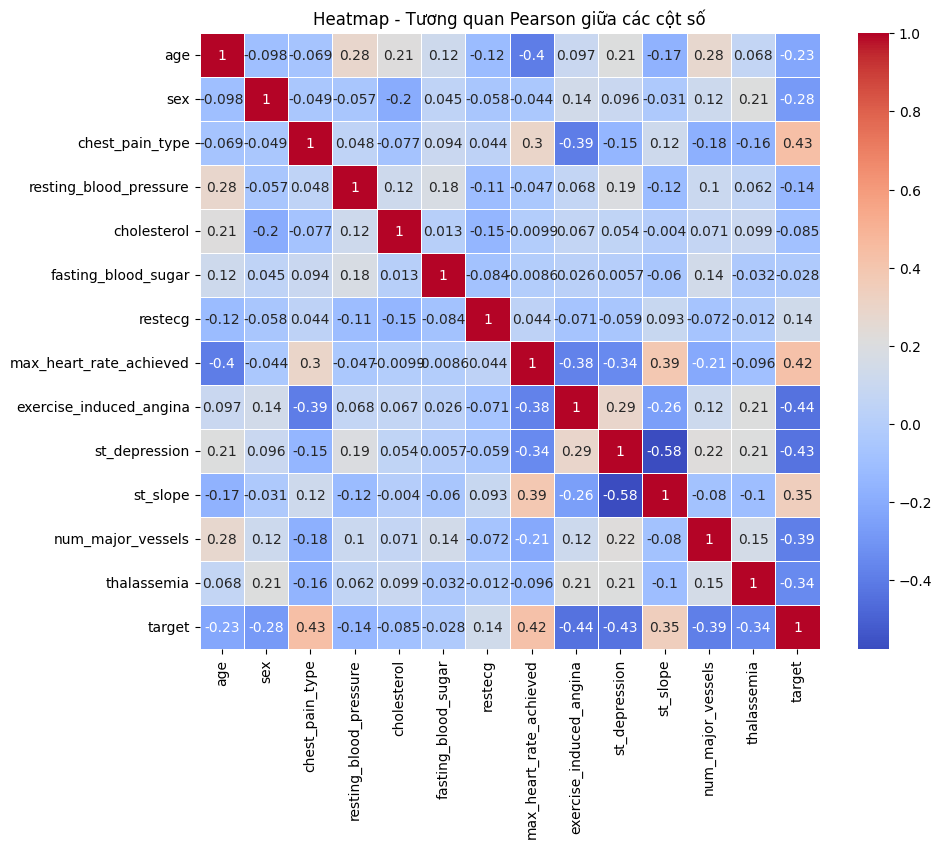

Võ Thành Hoàng Phúc - 6351071056


In [7]:
# 1. Lọc các cột dạng số để tính Pearson
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# 2. Tính ma trận tương quan Pearson
corr_matrix = numeric_cols.corr(method='pearson')

print("=== Pearson Correlation Matrix ===")
print(corr_matrix)

# 3. Vẽ heatmap bằng seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap - Tương quan Pearson giữa các cột số")
plt.show()

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 4

In [8]:
# Tách cột quyết định (Income) ra biến labels
labels = data['target']

# Tách phần còn lại làm features
features = data.drop(columns=['target'])

# Kiểm tra kết quả
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

print("\nFeatures columns:")
print(features.columns)

print("\nLabel samples:")
print(labels.head())

print("Võ Thành Hoàng Phúc - 6351071056")

Features shape: (303, 13)
Labels shape: (303,)

Features columns:
Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'restecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

Label samples:
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64
Võ Thành Hoàng Phúc - 6351071056


# Câu 5

In [9]:
features.select_dtypes(exclude=['int64']).columns
print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [10]:
# Chuyển các cột dạng object sang one-hot vector
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [11]:
features_onehot

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_slope,...,st_depression_3.2,st_depression_3.4,st_depression_3.5,st_depression_3.6,st_depression_3.8,st_depression_4.0,st_depression_4.2,st_depression_4.4,st_depression_5.6,st_depression_6.2
0,63,1,3,145,233,1,0,150,0,0,...,False,False,False,False,False,False,False,False,False,False
1,37,1,2,130,250,0,1,187,0,0,...,False,False,True,False,False,False,False,False,False,False
2,41,0,1,130,204,0,0,172,0,2,...,False,False,False,False,False,False,False,False,False,False
3,56,1,1,120,236,0,1,178,0,2,...,False,False,False,False,False,False,False,False,False,False
4,57,0,0,120,354,0,1,163,1,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,...,False,False,False,False,False,False,False,False,False,False
299,45,1,3,110,264,0,1,132,0,1,...,False,False,False,False,False,False,False,False,False,False
300,68,1,0,144,193,1,1,141,0,1,...,False,True,False,False,False,False,False,False,False,False
301,57,1,0,130,131,0,1,115,1,1,...,False,False,False,False,False,False,False,False,False,False


# Câu 6

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features_onehot, labels, test_size=0.3, random_state=42)

print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


# Câu 7

In [13]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.7582417582417582
Report:               precision    recall  f1-score   support

           0       0.72      0.76      0.74        41
           1       0.79      0.76      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

Võ Thành Hoàng Phúc - 6351071056


Võ Thành Hoàng Phúc - 6351071056


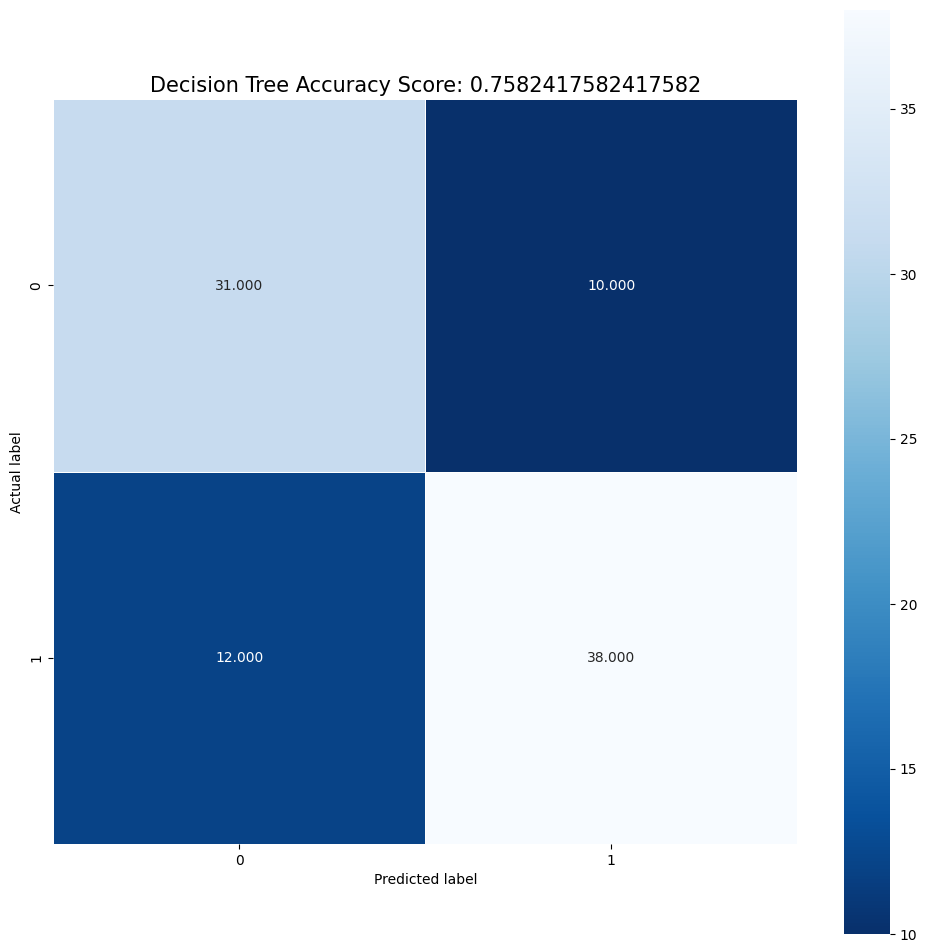

In [15]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

# Và biểu diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 8

In [16]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
#Predict the response for test dataset
cart_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Accuracy:", cart_score)
print("Report:", metrics.classification_report(y_test, cart_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.7802197802197802
Report:               precision    recall  f1-score   support

           0       0.74      0.78      0.76        41
           1       0.81      0.78      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

Võ Thành Hoàng Phúc - 6351071056


Võ Thành Hoàng Phúc - 6351071056


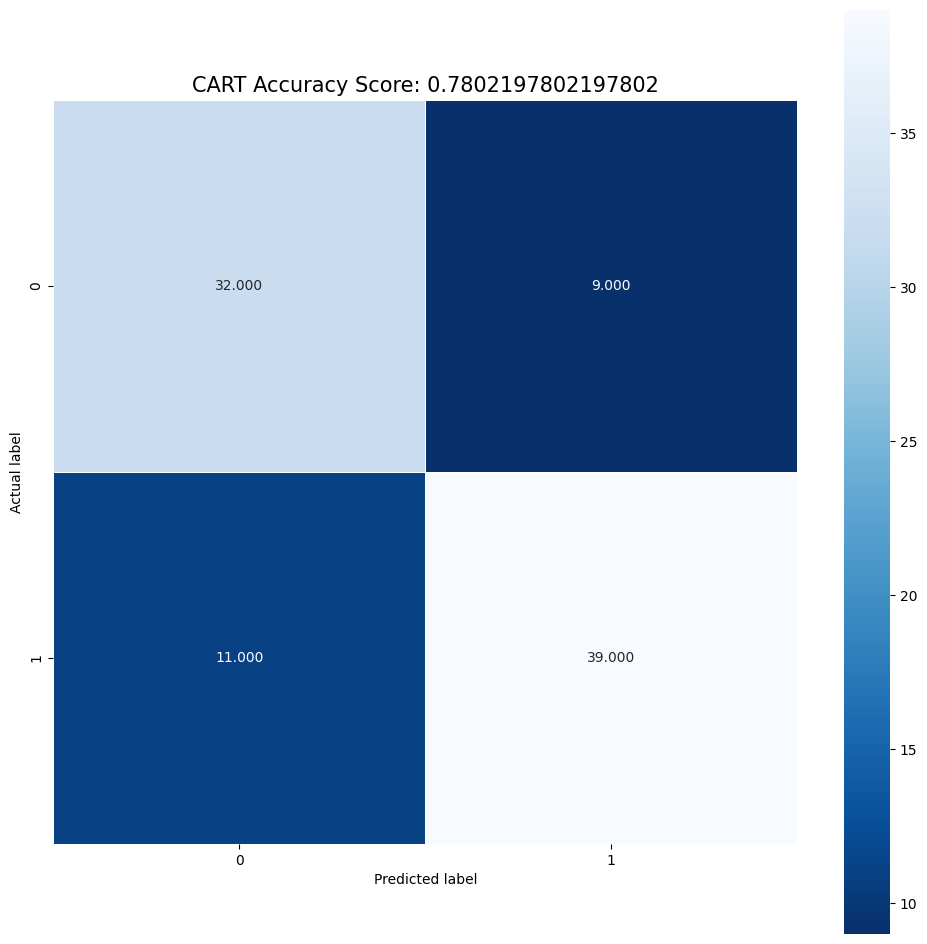

In [18]:
# Tính toán ma trận nhầm lẫn
cart_cm = metrics.confusion_matrix(y_test, cart_pred)

# Và biểu diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'CART Accuracy Score: {0}'.format(cart_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 9

In [19]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [20]:
# Model Accuracy, how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.6043956043956044
Report:               precision    recall  f1-score   support

           0       0.67      0.24      0.36        41
           1       0.59      0.90      0.71        50

    accuracy                           0.60        91
   macro avg       0.63      0.57      0.54        91
weighted avg       0.63      0.60      0.55        91

Võ Thành Hoàng Phúc - 6351071056


Võ Thành Hoàng Phúc - 6351071056


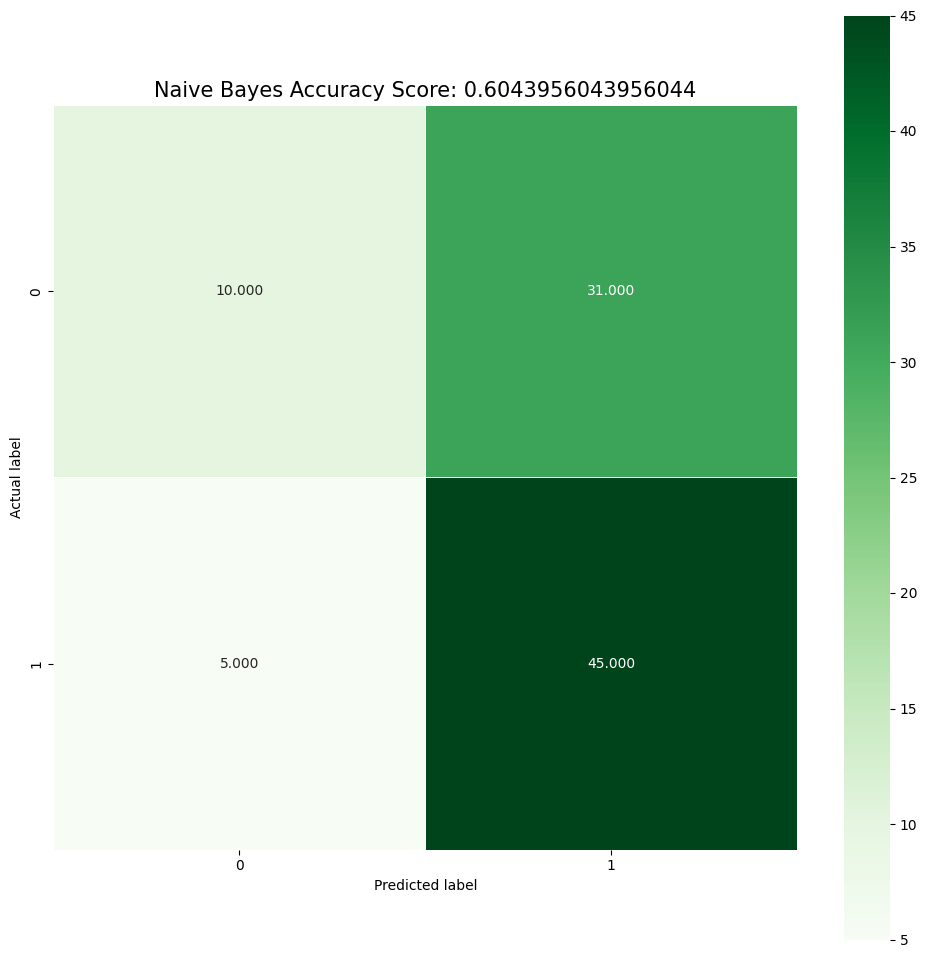

In [21]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 10

- Mô hình CART cho kết quả tốt nhất trên mọi phương diện:

  - Accuracy (78.0%): Cao nhất trong ba mô hình.

  - Chỉ số cân bằng (F1-score Macro Avg 0.78): Đây là điểm mạnh nhất. Mô hình này dự đoán tốt và cân bằng cho cả hai lớp (0 và 1) mà không bị thiên vị.

  - F1-score cho từng lớp: Đều đạt mức cao (0.76 cho lớp 0 và 0.80 cho lớp 1).

- Decision Tree (có thể dùng tiêu chí Entropy) cũng cho kết quả rất tốt, chỉ xếp sau CART một chút:

  - Accuracy (75.8%): Rất gần với CART.

  - Chỉ số cân bằng (F1-score Macro Avg 0.76): Tương tự như CART, mô hình này dự đoán rất cân bằng, cho thấy nó là một mô hình ổn định và đáng tin cậy.

- Naive Bayes có hiệu suất kém nhất và cho thấy một vấn đề nghiêm trọng trong cách dự đoán:

  - Accuracy (60.4%): Thấp hơn đáng kể so với hai mô hình cây.

  - F1-score Macro Avg (0.54): Chỉ số này rất thấp, cho thấy mô hình dự đoán mất cân bằng nghiêm trọng.